# CHE ROBA È? CARTELLA PL

In [153]:
nomi = []
nomi.append('data/PL?/Giak_0e25_10_532nm_76uW_75lmm_300k_Pbs.asc')
nomi.append('data/PL?/Giak_5_nkt750_75lmm_100pc_0e14_PbS900.asc')
nomi.append('data/PL?/Ric_QDPbS_900_35lmm_NKT747_42pc.asc')
nomi.append('data/PL?/Ric_QDPbS_900_nkt750_75lmm_100pc_10x.asc')

In [154]:
n_acq = [10, 5, 1, 1]

---

## Importazioni

In [155]:
from qp2_subroutines import *
import os

In [156]:
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

In [157]:
col = ['red', 'green', 'magenta', 'purple', 'peru', 'cyan', 
       'olive', 'goldenrod', 'black', 'sienna', 'steelblue', 'crimson']

---

---

# Analisi

In [158]:
# dictionary GaSb
# le keys saranno i filtri
# ciascuna key conterrà le due colonne del file:
# GaSb[filtro][0] - colonna 0 del file (lunghezze d'onda)
# GaSb[filtro][1] - colonna 1 del file (counts)

PbS_boh = {}

#### Lettura file

In [159]:
for nome in nomi:
    
    # Costruisco nome file
    # Estraggo i dati 
    waveln, counts = leggi_file_asc (nome)
    # Pulisco i counts da valori insensati
    counts = clean_counts_assorbimento (counts, n=1, n_primi=100, n_ultimi=100)
    # Raccolgo
    PbS_boh[nome] = (waveln, counts)

#### Plot su concentrazione

In [160]:
# regioni per i fit
regioni = []
regioni.append((850,1050))
regioni.append((865,1020))
regioni.append((800,1110))
regioni.append((815,1060))

• Grafico: 1
 - A = 0.9475946756199749
 - mu = 950.4415296609255
 - sigma = 84.72591183841116
 - chi2rid = 5.135973749914937


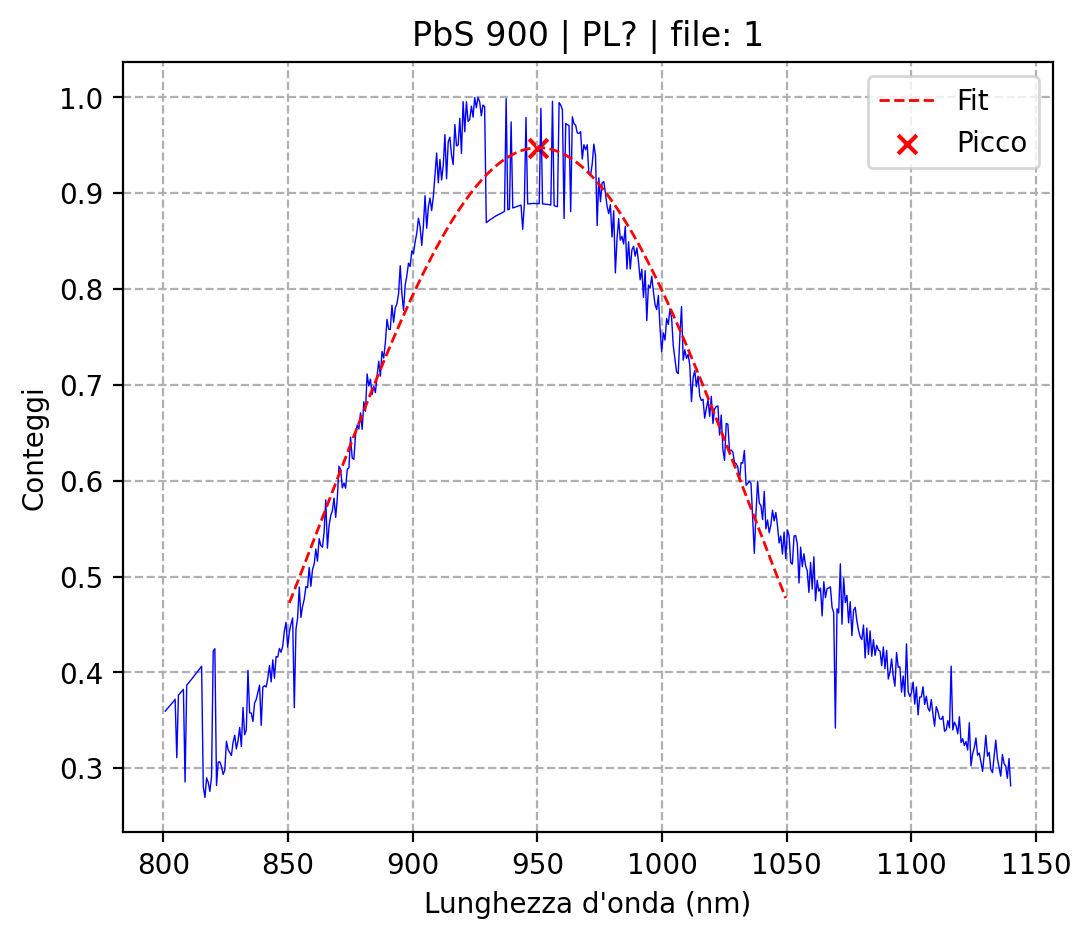

• Grafico: 2
 - A = 0.933048478095022
 - mu = 932.9726987830137
 - sigma = 78.41997675593069
 - chi2rid = 10.031034507992134


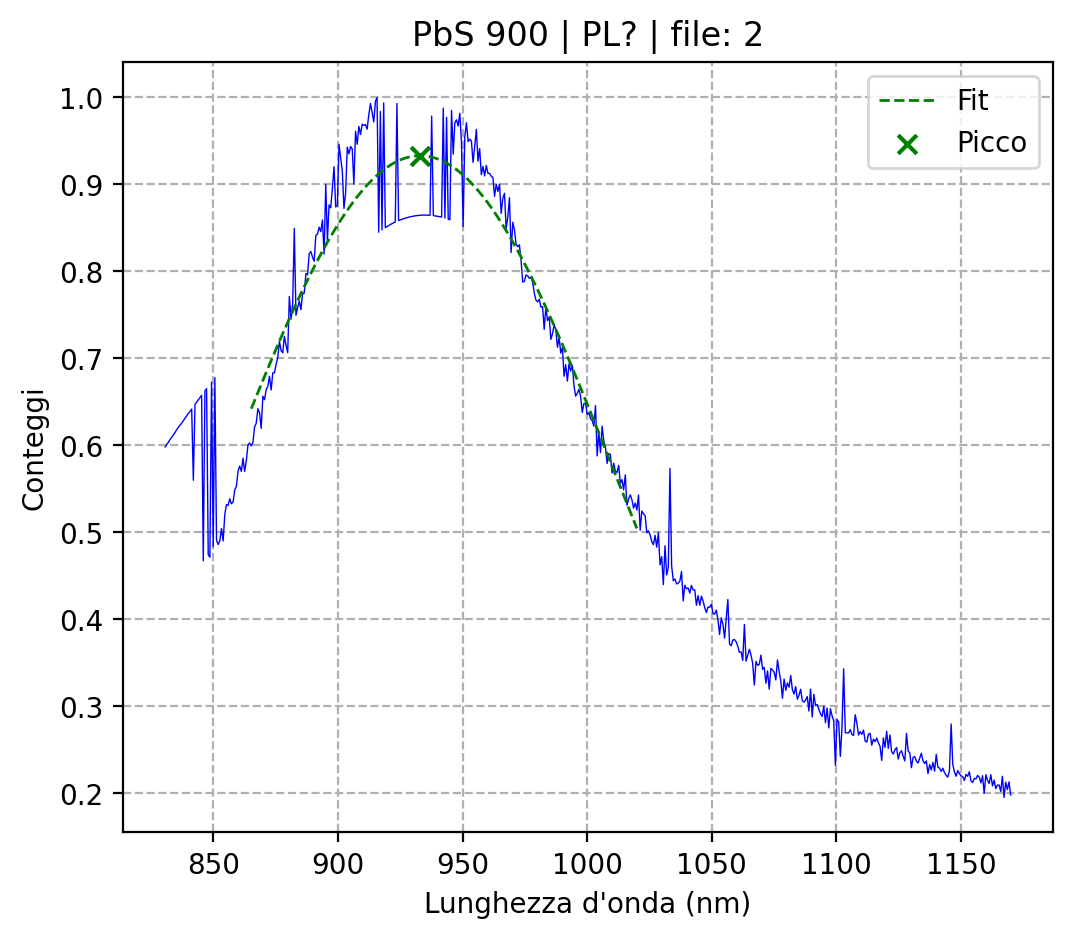

• Grafico: 3
 - A = 0.7233039495481683
 - mu = 948.0748651555135
 - sigma = 67.96441696708321
 - chi2rid = 5.750924790279319


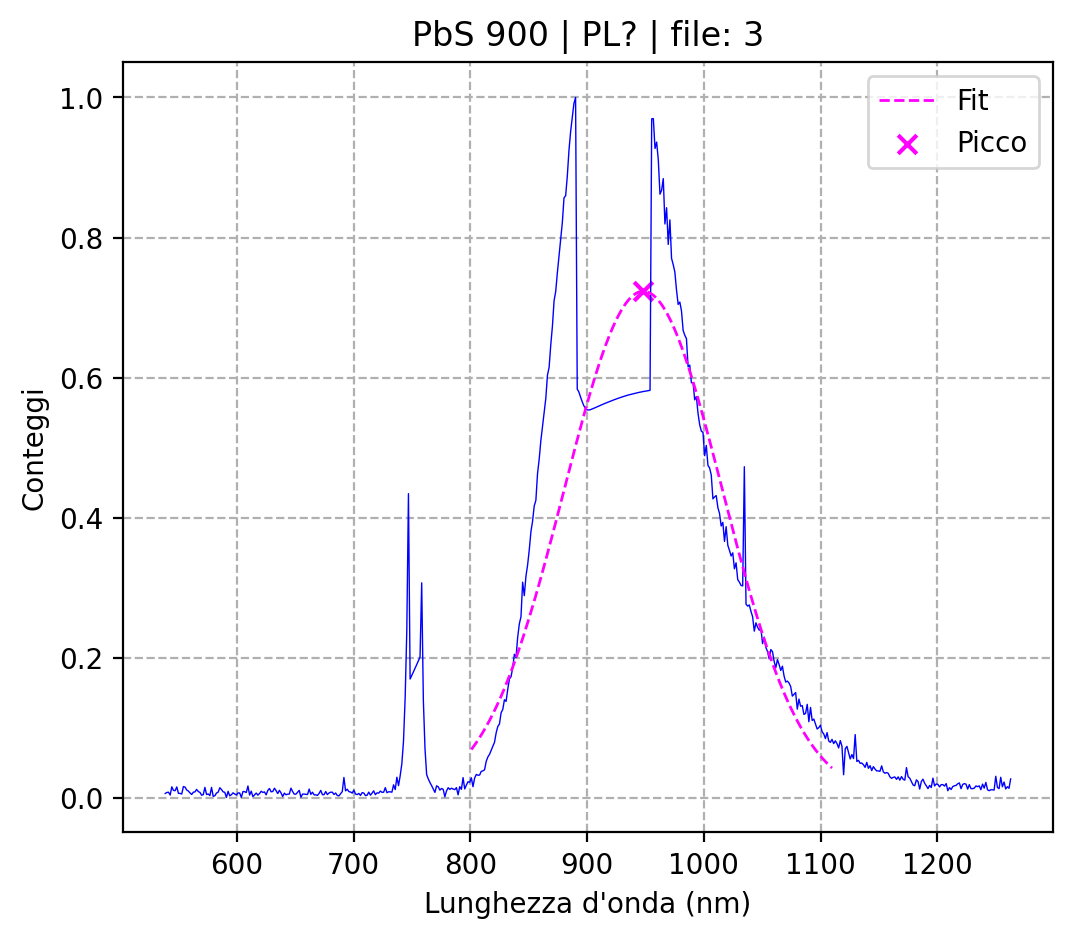

• Grafico: 4
 - A = 0.9474412926114834
 - mu = 952.814002581325
 - sigma = 89.640751673916
 - chi2rid = 4.625333856125269


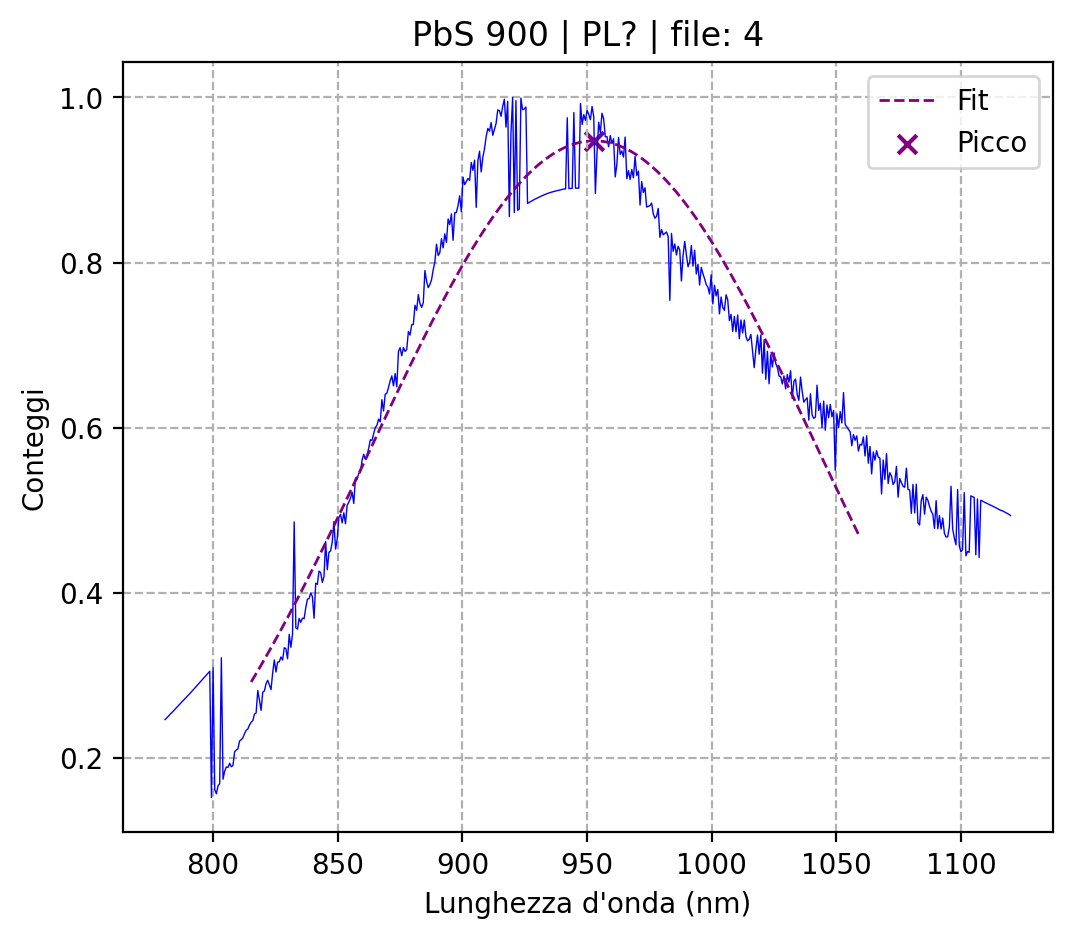

In [161]:
for i, nome in enumerate(nomi):
    
    ## PULIZIA DEI COUNTS ##
    waveln = PbS_boh[nome][0]
    counts = PbS_boh[nome][1]
    
    # normalizzo i counts
    maximum = np.max(counts)
    counts = counts / maximum
    

    ### PLOT E FIT ###
    
    # isolo regione fit
    mask = (waveln > regioni[i][0]) & (waveln < regioni[i][1])
    x_fit = waveln[mask]
    y_fit = counts[mask]

    # Plot
    plt.figure(figsize=(6,5), dpi=200)
    plt.plot(waveln, counts, linestyle='-', color='b', linewidth=0.5)#, zorder=1)
    
    ## UN FIT PER CIASCUN GRAFICO ##

    # imposto parametri: ogni entrata è una tripla (a, mu, sigma)
    params = np.array([1.5, 900, 100])
    
    # Set dei bounds per i parametri
    low = [0.0001, 800, 10]   # Limiti inferiori 
    upp = [2, 1100, 200]       # Limiti superiori


    err_y = np.sqrt(y_fit) / np.sqrt(40*n_acq[i])
    popt, pcov = curve_fit(gaussiana, x_fit, y_fit, sigma=err_y, p0=params, bounds=(low,upp))
    #popt,pcov,chi2_rid = fit_N_gaussiane (x_fit,y_fit,params,bounds=(low,upp),n_acq=n_acq[i])
    
    ## PLOT CURVA FIT ##
    x_plot = np.linspace(x_fit[0], x_fit[-1], 200)
    y_plot = gaussiana(x_plot, *popt)
    #y_plot = N_gaussiane(x_plot, *popt)
    
    plt.plot(x_plot, y_plot, linestyle='--', color=col[i], label=f"Fit", linewidth=1)#, zorder=2)

    # plotto anche i picchi individuati dal fit
    x_picco = popt[1]
    y_picco = gaussiana(x_picco, *popt)
    #y_picco = N_gaussiane(x_picco, *popt)
    plt.scatter(x_picco, y_picco, 
                color=col[i], marker='x',
                label='Picco', s=45)
    
    ## CALCOLO CHI2 ##
    chi2, dof = chi2_gaussiana(waveln, counts, popt)
    
    ## PRINT RISULTATI FIT ##
    print('• Grafico:', i+1)
    print(' - A =', popt[0])
    print(' - mu =', popt[1])
    print(' - sigma =', popt[2])
    print(' - chi2rid =', chi2/dof)
    #print(' - chi2rid =', chi2_rid)

    ## OPZIONI GRAFICHE ##
    plt.title('PbS 900 | PL? | file: ' + str(i+1))
    plt.xlabel("Lunghezza d'onda (nm)")
    plt.ylabel("Conteggi")
    #plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
    plt.legend()
    plt.grid(linestyle='--')
    #plt.tight_layout()
    plt.show()
